In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
conv=[[1,0],[0,1]]
x_mean=[1,4,8]
y_mean=[1,4,1]
def do_sample(size,distribution=None):
    X_1=np.random.choice([1,2,3],size=1000,p=distribution)
    normal_sample=[]
    for i in range(size):
        if X_1[i]==1:
            L=list(np.random.multivariate_normal((1,1),cov=conv))
            L.append(0)
            normal_sample.append(L)
        elif X_1[i]==2:
            L=list(np.random.multivariate_normal((4,4),cov=conv))
            L.append(1)
            normal_sample.append(L)
        else:
            L=list(np.random.multivariate_normal((8,1),cov=conv))
            L.append(2) 
            normal_sample.append(L)
    return normal_sample



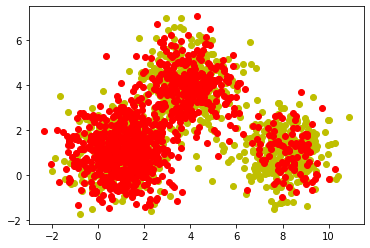

In [2]:
sample_1=do_sample(1000,)
sample_2=do_sample(1000,distribution=[0.6,0.3,0.1])
def im_show(sample,color=None):
    x_list=[]
    y_list=[]
    for item in sample:
        x_list.append(item[0])
        y_list.append(item[1])
    plt.scatter(x_list,y_list,c=color)
im_show(sample_1,color='y')
im_show(sample_2,color='r')

In [3]:
def MAP(x,y,ux,uy,p):
    return math.exp(-0.25*((x-ux)**2+(y-uy)**2))*p/(math.pi*4)#概率计算

In [4]:
def single_evalue(item,probability):
    score=[]
    for i in np.arange(0,3):
        score.append(MAP(item[0],item[1],x_mean[i],y_mean[i],probability[i]))
    res=max(score)
    for ite in np.arange(0,3):
        if(score[ite]==res):
            return ite
acc1=0
for iter_num in np.arange(0,1000):
    if(single_evalue(sample_2[iter_num],[0.6,0.3,0.1])==sample_2[iter_num][2]):
        acc1=acc1+1
print(acc1/1000)
acc2=0
for iter_num in np.arange(0,1000):
    if(single_evalue(sample_1[iter_num],[1/3,1/3,1/3])==sample_1[iter_num][2]):
        acc2=acc2+1
print(acc2/1000)       

0.98
0.987


计算得到某个点中的核密度————需要其周边的分类

In [5]:
H=[0.1,0.5,1,1.5,2]
def density_cal_window(k):
    return 1/k**2  #D=2
def gaussian_cal(k,tar_x,tar_y,x_i,y_i):
    return 1/(math.sqrt(2*math.pi*k**2))*np.power(np.e,(-((tar_x-x_i)**2+(tar_y-y_i)**2)/2*k**2))

In [6]:
def another_cal(k,tar_x,tar_y,x_i,y_i):
    return math.exp(-(((tar_x-x_i)**2+(tar_y-y_i)**2)/2*(k**2)))/math.sqrt(2*math.pi*(k**2))

In [7]:
def gaussian_KDE(k,sample):
    predict_result=[]
    acc=0
    for item in range(1000):
        score=[0,0,0]
        count_class=[0,0,0]
        for i in range(1000):
            score[sample[i][2]]=score[sample[i][2]]+gaussian_cal(k,sample[item][0],sample[item][1],x_mean[sample[i][2]],y_mean[sample[i][2]])
        res=max(score)
        for i in np.arange(0,3):
            if (res==score[i]):
                predict_result.append(i)
        
    for i in range(0,1000):
        if (predict_result[i]==sample[i][2]):
            acc=acc+1
    print('the accuracy is %.3f ' % (acc/1000))
    acc=0

print('for sample 1:')
for item in H:
    gaussian_KDE(item,sample_1)    
print('for sample 2:')
for item in H:
    gaussian_KDE(item,sample_2)     
#KDE(H[3],sample_1)   


for sample 1:
the accuracy is 0.913 
the accuracy is 0.987 
the accuracy is 0.987 
the accuracy is 0.987 
the accuracy is 0.987 
for sample 2:
the accuracy is 0.597 
the accuracy is 0.973 
the accuracy is 0.984 
the accuracy is 0.988 
the accuracy is 0.987 


In [8]:
def KDE(k,sample):
    predict_result=[]
    acc=0
    for item in range(1000):
        score=[0,0,0]
        for i in range(1000):
            if (item==i):
                continue
            elif(sample[item][0]-sample[i][0]<=k and sample[item][1]-sample[i][1]<=k ):
                score[sample[i][2]]=score[sample[i][2]]+density_cal_window(k)
        res=max(score)
        for i in np.arange(0,3):
            if (res==score[i]):
                predict_result.append(i)
    
    for i in range(0,1000):
        if (predict_result[i]==sample[i][2]):
            acc=acc+1
    print('the accuracy is %.3f ' % (acc/1000))
    
for item in H:
    KDE(item,sample_1)    
print('for sample 2:')
for item in H:
    KDE(item,sample_2)  

the accuracy is 0.461 
the accuracy is 0.485 
the accuracy is 0.464 
the accuracy is 0.699 
the accuracy is 0.420 
for sample 2:
the accuracy is 0.379 
the accuracy is 0.411 
the accuracy is 0.511 
the accuracy is 0.664 
the accuracy is 0.960 


In [9]:
def calculate_distance(num,target): #Manhannton
    return np.abs(num[0] - target[0])+np.abs(num[1]-target[1])

In [10]:
def knn(input_num, sample, k):
    store={}
    for i in np.arange(1000):
        dist=calculate_distance(sample[input_num],sample[i])
        store[i]=dist
    store[input_num]=10000
    dict1=sorted(store.items(),key=lambda x:x[1])
    dict2=dict1[1:k+1]#序号+距离
    choice=[0,0,0]
    for item in dict2:
        choice[sample[item[0]][2]]=choice[sample[item[0]][2]] +1
    res=max(choice)
    for i in np.arange(3):
        if choice[i]==res:
            maxlable=i
    return maxlable

In [11]:
def test(sample,K):
    acc=0
    for i in np.arange(1000):       
        labeli=knn(i,sample,K)
        if(labeli==sample[i][2]):
            acc=acc+1
    return acc
K=[1,3,5]
for item in K:
    result=test(sample_1,item)
    print(result)
for item in K:
    result=test(sample_2,item)
    print(result)
        


980
983
983
971
980
981
